# Quickstart for TARDIS

Every simulation run requires [atomic data](io/configuration/components/atomic/atomic_data.rst) and a [configuration file](io/configuration/index.rst). 

## Atomic Data

We recommend using the [kurucz_cd23_chianti_H_He.h5](https://dev.azure.com/tardis-sn/TARDIS/_apis/git/repositories/tardis-refdata/items?path=atom_data/kurucz_cd23_chianti_H_He.h5&resolveLfs=true) dataset.

In [11]:
from tardis.io.atom_data.util import download_atom_data

In [12]:
download_atom_data('kurucz_cd23_chianti_H_He')

[tardis.io.atom_data.atom_web_download][INFO   ]  


INFO:tardis.io.atom_data.atom_web_download:Downloading atomic data from https://dev.azure.com/tardis-sn/TARDIS/_apis/git/repositories/tardis-refdata/items?path=atom_data/kurucz_cd23_chianti_H_He.h5&resolveLfs=true to /Users/jaewonkim/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5


You can also obtain a copy of the atomic data from the [tardis-refdata](https://github.com/tardis-sn/tardis-refdata/tree/master/atom_data) repository.

## Example Configuration File

The configuration file [tardis_example.yml](https://github.com/tardis-sn/tardis/tree/master/docs/tardis_example.yml) is used throughout this Quickstart.

In [13]:
!wget -q -nc https://raw.githubusercontent.com/tardis-sn/tardis/master/docs/tardis_example.yml

In [14]:
!cat tardis_example.yml

# Example YAML configuration for TARDIS
tardis_config_version: v1.0

supernova:
  luminosity_requested: 9.44 log_lsun
  time_explosion: 13 day

atom_data: kurucz_cd23_chianti_H_He.h5

model:
  structure:
    type: specific
    velocity:
      start: 1.1e4 km/s
      stop: 20000 km/s
      num: 20
    density:
      type: branch85_w7

  abundances:
    type: uniform
    O: 0.19
    Mg: 0.03
    Si: 0.52
    S: 0.19
    Ar: 0.04
    Ca: 0.03

plasma:
  disable_electron_scattering: no
  ionization: lte
  excitation: lte
  radiative_rates_type: dilute-blackbody
  line_interaction_type: macroatom

montecarlo:
  seed: 23111963
  no_of_packets: 4.0e+4
  iterations: 20
  nthreads: 1

  last_no_of_packets: 1.e+5
  no_of_virtual_packets: 10

  convergence_strategy:
    type: damped
    damping_constant: 1.0
    threshold: 0.05
    fraction: 0.8
    hold_iterations: 3
    t_inner:
      damping_constant: 0.5

spectrum:
  start: 500 angstrom
  stop: 20000 angstrom
  num: 10000


## Running the Simulation

To run the simulation, import the `run_tardis` function and create the `sim` object. 

In [15]:
from tardis import run_tardis

<div class="alert alert-info">

**Note:**

Get more information about the [progress bars](io/output/progress_bars.rst), [logging configuration](io/optional/logging_configuration.ipynb), and [convergence plots](io/visualization/convergence_plot.ipynb). 
    
</div>

In [16]:
sim = run_tardis("tardis_example.yml", 
                 virtual_packet_logging=True,
                 show_convergence_plots=True,
                 export_convergence_plots=True,
                 log_level="INFO") 

[tardis.plasma.standard_plasmas][INFO   ]  
	
	Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:95)


INFO:tardis.plasma.standard_plasmas:
	Reading Atomic Data from kurucz_cd23_chianti_H_He.h5


[tardis.io.atom_data.base][INFO   ]  
	Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace  (base.py:249)


INFO:tardis.io.atom_data.base:Reading Atom Data with: UUID = 6f7b09e887a311e7a06b246e96350010 MD5  = 864f1753714343c41f99cb065710cace 


[tardis.io.atom_data.base][INFO   ]  
	Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data (base.py:253)


INFO:tardis.io.atom_data.base:Non provided Atomic Data: synpp_refs, photoionization_data, yg_data, two_photon_data


[py.warnings         ][WARNING]  
	/Users/jaewonkim/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning:

invalid value encountered in true_divide

 (warnings.py:109)



invalid value encountered in true_divide




[tardis.simulation.base][INFO   ]  
	
	Starting iteration 1 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 1 of 20


TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:   ', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 7.942e+42 erg / s
	Luminosity absorbed  = 2.659e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 7.942e+42 erg / s
	Luminosity absorbed  = 2.659e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,9.93e+03,1.01e+04,0.4,0.507
5,9.85e+03,1.02e+04,0.211,0.197
10,9.78e+03,1.01e+04,0.143,0.117
15,9.71e+03,9.87e+03,0.105,0.0869


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 9933.952 K
	Expected t_inner for next iteration = 10703.212 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 9933.952 K
	Expected t_inner for next iteration = 10703.212 K



    'data': [{'type': 'scatter', 'uid': '5c0c73dd-a0a3-433d-9111-a6346f6de844', …

[tardis.simulation.base][INFO   ]  
	
	Starting iteration 2 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 2 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.071e+43 erg / s
	Luminosity absorbed  = 3.576e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.071e+43 erg / s
	Luminosity absorbed  = 3.576e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.01e+04,1.08e+04,0.507,0.525
5,1.02e+04,1.1e+04,0.197,0.203
10,1.01e+04,1.08e+04,0.117,0.125
15,9.87e+03,1.05e+04,0.0869,0.0933


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10703.212 K
	Expected t_inner for next iteration = 10673.712 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10703.212 K
	Expected t_inner for next iteration = 10673.712 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 3 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 3 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.074e+43 erg / s
	Luminosity absorbed  = 3.391e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.074e+43 erg / s
	Luminosity absorbed  = 3.391e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.08e+04,1.1e+04,0.525,0.483
5,1.1e+04,1.12e+04,0.203,0.189
10,1.08e+04,1.1e+04,0.125,0.118
15,1.05e+04,1.06e+04,0.0933,0.0895


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10673.712 K
	Expected t_inner for next iteration = 10635.953 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10673.712 K
	Expected t_inner for next iteration = 10635.953 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 4 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 4 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.058e+43 erg / s
	Luminosity absorbed  = 3.352e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.058e+43 erg / s
	Luminosity absorbed  = 3.352e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.483,0.469
5,1.12e+04,1.12e+04,0.189,0.182
10,1.1e+04,1.1e+04,0.118,0.113
15,1.06e+04,1.07e+04,0.0895,0.0861


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10635.953 K
	Expected t_inner for next iteration = 10638.407 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10635.953 K
	Expected t_inner for next iteration = 10638.407 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 5 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 5 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.055e+43 erg / s
	Luminosity absorbed  = 3.399e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.055e+43 erg / s
	Luminosity absorbed  = 3.399e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 1/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.469,0.479
5,1.12e+04,1.13e+04,0.182,0.178
10,1.1e+04,1.1e+04,0.113,0.113
15,1.07e+04,1.07e+04,0.0861,0.0839


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10638.407 K
	Expected t_inner for next iteration = 10650.202 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10638.407 K
	Expected t_inner for next iteration = 10650.202 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 6 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 6 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.398e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.398e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 2/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 2/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.479,0.47
5,1.13e+04,1.12e+04,0.178,0.185
10,1.1e+04,1.11e+04,0.113,0.112
15,1.07e+04,1.07e+04,0.0839,0.0856


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10650.202 K
	Expected t_inner for next iteration = 10645.955 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10650.202 K
	Expected t_inner for next iteration = 10645.955 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 7 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 7 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.382e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.382e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 3/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 3/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.47,0.47
5,1.12e+04,1.13e+04,0.185,0.178
10,1.11e+04,1.11e+04,0.112,0.112
15,1.07e+04,1.07e+04,0.0856,0.086


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10645.955 K
	Expected t_inner for next iteration = 10642.050 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10645.955 K
	Expected t_inner for next iteration = 10642.050 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 8 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 8 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.062e+43 erg / s
	Luminosity absorbed  = 3.350e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.062e+43 erg / s
	Luminosity absorbed  = 3.350e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 4/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 4/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.11e+04,0.47,0.472
5,1.13e+04,1.14e+04,0.178,0.175
10,1.11e+04,1.11e+04,0.112,0.111
15,1.07e+04,1.07e+04,0.086,0.084


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10642.050 K
	Expected t_inner for next iteration = 10636.106 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10642.050 K
	Expected t_inner for next iteration = 10636.106 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 9 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 9 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.052e+43 erg / s
	Luminosity absorbed  = 3.411e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.052e+43 erg / s
	Luminosity absorbed  = 3.411e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 5/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 5/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.472,0.469
5,1.14e+04,1.15e+04,0.175,0.17
10,1.11e+04,1.11e+04,0.111,0.109
15,1.07e+04,1.08e+04,0.084,0.0822


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10636.106 K
	Expected t_inner for next iteration = 10654.313 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10636.106 K
	Expected t_inner for next iteration = 10654.313 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 10 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 10 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.070e+43 erg / s
	Luminosity absorbed  = 3.335e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.070e+43 erg / s
	Luminosity absorbed  = 3.335e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.1e+04,0.469,0.475
5,1.15e+04,1.14e+04,0.17,0.177
10,1.11e+04,1.11e+04,0.109,0.112
15,1.08e+04,1.06e+04,0.0822,0.0878


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10654.313 K
	Expected t_inner for next iteration = 10628.190 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10654.313 K
	Expected t_inner for next iteration = 10628.190 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 11 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 11 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.053e+43 erg / s
	Luminosity absorbed  = 3.363e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.053e+43 erg / s
	Luminosity absorbed  = 3.363e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 1/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.475,0.472
5,1.14e+04,1.12e+04,0.177,0.184
10,1.11e+04,1.1e+04,0.112,0.114
15,1.06e+04,1.06e+04,0.0878,0.0859


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10628.190 K
	Expected t_inner for next iteration = 10644.054 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10628.190 K
	Expected t_inner for next iteration = 10644.054 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 12 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 12 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.056e+43 erg / s
	Luminosity absorbed  = 3.420e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.056e+43 erg / s
	Luminosity absorbed  = 3.420e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.11e+04,0.472,0.467
5,1.12e+04,1.13e+04,0.184,0.176
10,1.1e+04,1.11e+04,0.114,0.11
15,1.06e+04,1.08e+04,0.0859,0.0821


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10644.054 K
	Expected t_inner for next iteration = 10653.543 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10644.054 K
	Expected t_inner for next iteration = 10653.543 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 13 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 13 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.062e+43 erg / s
	Luminosity absorbed  = 3.406e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.062e+43 erg / s
	Luminosity absorbed  = 3.406e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 1/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.467,0.466
5,1.13e+04,1.13e+04,0.176,0.18
10,1.11e+04,1.11e+04,0.11,0.111
15,1.08e+04,1.08e+04,0.0821,0.0841


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10653.543 K
	Expected t_inner for next iteration = 10647.277 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10653.543 K
	Expected t_inner for next iteration = 10647.277 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 14 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 14 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.063e+43 erg / s
	Luminosity absorbed  = 3.369e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.063e+43 erg / s
	Luminosity absorbed  = 3.369e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 2/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 2/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.466,0.469
5,1.13e+04,1.13e+04,0.18,0.182
10,1.11e+04,1.1e+04,0.111,0.113
15,1.08e+04,1.07e+04,0.0841,0.0854


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10647.277 K
	Expected t_inner for next iteration = 10638.875 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10647.277 K
	Expected t_inner for next iteration = 10638.875 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 15 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 15 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.053e+43 erg / s
	Luminosity absorbed  = 3.417e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.053e+43 erg / s
	Luminosity absorbed  = 3.417e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 3/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 3/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.1e+04,0.469,0.484
5,1.13e+04,1.13e+04,0.182,0.181
10,1.1e+04,1.1e+04,0.113,0.113
15,1.07e+04,1.07e+04,0.0854,0.0858


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10638.875 K
	Expected t_inner for next iteration = 10655.125 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10638.875 K
	Expected t_inner for next iteration = 10655.125 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 16 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 16 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.059e+43 erg / s
	Luminosity absorbed  = 3.445e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.059e+43 erg / s
	Luminosity absorbed  = 3.445e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 4/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 4/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.1e+04,0.484,0.472
5,1.13e+04,1.13e+04,0.181,0.177
10,1.1e+04,1.1e+04,0.113,0.113
15,1.07e+04,1.06e+04,0.0858,0.0858


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10655.125 K
	Expected t_inner for next iteration = 10655.561 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10655.125 K
	Expected t_inner for next iteration = 10655.561 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 17 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 17 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.067e+43 erg / s
	Luminosity absorbed  = 3.372e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.067e+43 erg / s
	Luminosity absorbed  = 3.372e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.1e+04,1.11e+04,0.472,0.468
5,1.13e+04,1.14e+04,0.177,0.175
10,1.1e+04,1.11e+04,0.113,0.11
15,1.06e+04,1.08e+04,0.0858,0.0816


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10655.561 K
	Expected t_inner for next iteration = 10636.536 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10655.561 K
	Expected t_inner for next iteration = 10636.536 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 18 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 18 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.057e+43 erg / s
	Luminosity absorbed  = 3.365e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.057e+43 erg / s
	Luminosity absorbed  = 3.365e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 1/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 1/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.468,0.464
5,1.14e+04,1.13e+04,0.175,0.177
10,1.11e+04,1.1e+04,0.11,0.113
15,1.08e+04,1.07e+04,0.0816,0.0848


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10636.536 K
	Expected t_inner for next iteration = 10641.692 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10636.536 K
	Expected t_inner for next iteration = 10641.692 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 19 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 19 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.056e+43 erg / s
	Luminosity absorbed  = 3.405e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.056e+43 erg / s
	Luminosity absorbed  = 3.405e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	Iteration converged 2/4 consecutive times. (base.py:266)


INFO:tardis.simulation.base:Iteration converged 2/4 consecutive times.


[tardis.simulation.base][INFO   ]  
	
	Plasma stratification: (base.py:527)


INFO:tardis.simulation.base:
	Plasma stratification:


Shell No.,t_rad,next_t_rad,w,next_w
0,1.11e+04,1.11e+04,0.464,0.466
5,1.13e+04,1.13e+04,0.177,0.177
10,1.1e+04,1.11e+04,0.113,0.111
15,1.07e+04,1.07e+04,0.0848,0.0853


[tardis.simulation.base][INFO   ]  
	
	Current t_inner = 10641.692 K
	Expected t_inner for next iteration = 10650.463 K
 (base.py:554)


INFO:tardis.simulation.base:
	Current t_inner = 10641.692 K
	Expected t_inner for next iteration = 10650.463 K



[tardis.simulation.base][INFO   ]  
	
	Starting iteration 20 of 20 (base.py:385)


INFO:tardis.simulation.base:
	Starting iteration 20 of 20


[tardis.simulation.base][INFO   ]  
	
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.401e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s
 (base.py:559)


INFO:tardis.simulation.base:
	Luminosity emitted   = 1.061e+43 erg / s
	Luminosity absorbed  = 3.401e+42 erg / s
	Luminosity requested = 1.059e+43 erg / s



[tardis.simulation.base][INFO   ]  
	
	Simulation finished in 20 iterations 
	Simulation took 18.19 s
 (base.py:480)


INFO:tardis.simulation.base:
	Simulation finished in 20 iterations 
	Simulation took 18.19 s



## Plotting the Spectrum

Finally, plot the generated spectrum with `matplotlib`.

In [17]:
import matplotlib.pyplot as plt

In [18]:
spectrum = sim.runner.spectrum
spectrum_virtual = sim.runner.spectrum_virtual
spectrum_integrated = sim.runner.spectrum_integrated

[py.warnings         ][WARNING]  
	/Users/jaewonkim/tardis/tardis/montecarlo/montecarlo_numba/formal_integral.py:371: UserWarning:

The number of interpolate_shells was not specified. The value was set to 80.

 (warnings.py:109)



The number of interpolate_shells was not specified. The value was set to 80.




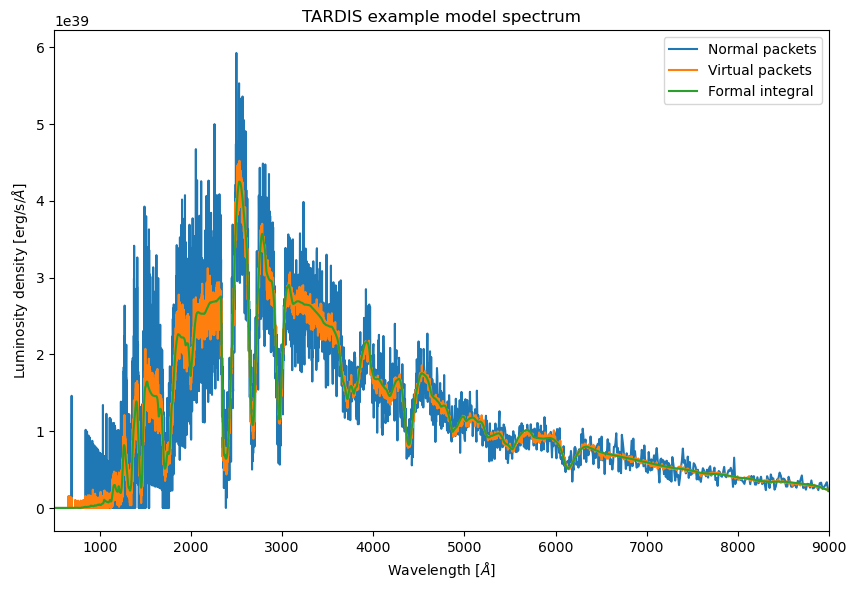

In [19]:
%matplotlib inline
plt.figure(figsize=(10, 6.5))

spectrum.plot(label="Normal packets")
spectrum_virtual.plot(label="Virtual packets")
spectrum_integrated.plot(label='Formal integral')

plt.xlim(500, 9000)
plt.title("TARDIS example model spectrum")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Luminosity density [erg/s/$\AA$]")
plt.legend()
plt.show()